In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import torch

In [2]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

# Load data

In [3]:
path = 'C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/data/dogsandcats/trainandvalid'

- Dataset can be downloaded [here](https://www.kaggle.com/c/dogs-vs-cats/data).

## Using glob

In [4]:
from glob import glob
import os

files = glob(os.path.join(path,'*/*.jpg'))
print(f'Total no of images {len(files)}')

Total no of images 25000


- Read all '.jpg' files inside the folder
- Use *iglob* when there are too many files to load

In [5]:
no_of_images = 25000

In [6]:
np.random.seed(0)
shuffle = np.random.permutation(no_of_images)

In [7]:
shuffle

array([14149,  8946, 22378, ...,  9845, 10799,  2732])

- Return a randomly permuted sequence of 0,1,...,24999
- list of integers used for selecting validation data

In [8]:
os.mkdir(os.path.join(path,'train'))
os.mkdir(os.path.join(path,'valid'))

for t in ['train','valid']:
    for folder in ['dog/','cat/']:
        os.mkdir(os.path.join(path,t,folder))

1. Create *train* and *valid* folder
2. Under these folders, create *cat* and *dog* folder respectively

In [9]:
for i in shuffle[:2000]:
    folder = files[i].split('/')[-1].split('.')[0][-3:]
    image = files[i].split('/')[-1][22:]
    os.rename(files[i], os.path.join(path,'valid',folder,image))

- Randomly select 2000 images and move them to the corresponding folder(either *dog* or *cat*) under *valid*

In [10]:
for i in shuffle[2000:]:
    folder = files[i].split('/')[-1].split('.')[0][-3:]
    image = files[i].split('/')[-1][22:]
    os.rename(files[i], os.path.join(path,'train',folder,image))

- Move remaining 23000 images to *train*

In [11]:
from torchvision import transforms
from torchvision.datasets import ImageFolder

simple_transform = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
train = ImageFolder('C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/data/dogsandcats/trainandvalid/train', simple_transform)
valid = ImageFolder('C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/data/dogsandcats/trainandvalid/valid', simple_transform)

1. Resize all images to the same size
2. Convert to tensor
3. Normalize by mean and standard deviation of each RGB channel

In [12]:
print(train.class_to_idx)
print(train.classes)

{'cat': 0, 'dog': 1}
['cat', 'dog']


In [13]:
def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229,0.224,0.225])
    inp = std * inp + mean
    inp = np.clip(inp,0,1)
    plt.imshow(inp)

1. Convert tensor to numpy, then transpose the matrix
2. Denormalize data
3. Replace values not in [0,1]

In [14]:
train[50][0].numpy().shape

(3, 224, 224)

- number of RGB channels X width X height

In [15]:
train[50][0].numpy().transpose((1,2,0)).shape

(224, 224, 3)

- 14~15: Code for explaining how does *transpose* work

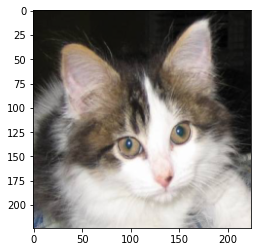

In [16]:
imshow(train[50][0])

In [17]:
train_data_gen = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True, num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(valid, batch_size=16, shuffle=True, num_workers=3)

- num_workers: responsible for parallelization
 - generally assigned smaller value than the number of cores available in the machine
 - but bigger value does not always guarantee better result

## Using iglob

In [ ]:
from glob import iglob

gen = iglob(os.path.join(path,'*/*.jpg'))
it = iter(gen)
it

In [ ]:
no_of_images = 25000

In [ ]:
os.mkdir(os.path.join(path,'train'))
os.mkdir(os.path.join(path,'valid'))

for t in ['train','valid']:
    for folder in ['dog/','cat/']:
        os.mkdir(os.path.join(path,t,folder))

In [ ]:
np.random.seed(0)

shuffle = np.repeat(0, no_of_images)
idx = np.random.permutation(no_of_images)

for i in idx[:2000]:
    shuffle[i] = 1

In [ ]:
while True:
    try:
        for i in range((no_of_images+1)):
            file = next(it)
            folder = file.split('/')[-1].split('.')[0][-3:]
            image = file.split('/')[-1][22:]
            if shuffle[i]==1:
                os.rename(file, os.path.join(path,'valid',folder,image))
            else:
                os.rename(file, os.path.join(path,'train',folder,image))
    except StopIteration:
        break

# Build vanilla CNN

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=0)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(56180,500)
        self.fc2 = nn.Linear(500,50)
        self.fc3 = nn.Linear(50,2)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        y = x.view(x.size(0),-1)
        return x,y

In [19]:
from torch.autograd import Variable

def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    running_loss = 0.0
    running_correct = 0
    for batch_idx, (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data,target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        x,y = model(data)
            
    return x,y

In [20]:
import torch.optim as optim

model = Net()
if is_cuda:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
x,y = fit(1, model, train_data_gen, phase='training')

In [21]:
x.shape

torch.Size([8, 20, 53, 53])

In [22]:
y.shape

torch.Size([8, 56180])

In [23]:
x.view(-1,x.shape[0]).shape

torch.Size([56180, 8])

- 18~23: Code for explaining how does *view* work

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=0)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(56180,500)
        self.fc2 = nn.Linear(500,50)
        self.fc3 = nn.Linear(50,2)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

1. convolutional layer1 - max pooling - ReLU activation
2. convolutional layer2 - dropout - max pooling - ReLU activation
3. view
4. linear layer1 - ReLU activation
5. dropout
6. linear layer2 - ReLU activation
7. dropout
8. linear layer3
9. softmax

- Additional linear layer for more flexibility

In [25]:
from torch.autograd import Variable

def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx,(data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data,target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        
        running_loss += F.nll_loss(output, target, reduction='mean').data
        preds = output.data.max(dim=1, keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
            
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct.item()/len(data_loader.dataset)
        
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [26]:
import torch.optim as optim

model = Net()
if is_cuda:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
train_losses,train_accuracy = [],[]
val_losses,val_accuracy = [],[]

for epoch in range(1,20):
    train_epoch_loss,train_epoch_accuracy = fit(epoch, model, train_data_gen, phase='training')
    val_epoch_loss,val_epoch_accuracy = fit(epoch, model, valid_data_gen, phase='validation')
    train_losses.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

training loss is 0.042 and training accuracy is 13450/23000     58.48
validation loss is 0.039 and validation accuracy is 1298/2000      64.9
training loss is 0.038 and training accuracy is 15341/23000      66.7
validation loss is 0.033 and validation accuracy is 1465/2000     73.25
training loss is 0.035 and training accuracy is 16333/23000     71.01
validation loss is 0.031 and validation accuracy is 1535/2000     76.75
training loss is 0.033 and training accuracy is 16961/23000     73.74
validation loss is  0.03 and validation accuracy is 1557/2000     77.85
training loss is  0.03 and training accuracy is 17631/23000     76.66
validation loss is 0.029 and validation accuracy is 1551/2000     77.55
training loss is 0.029 and training accuracy is 18091/23000     78.66
validation loss is 0.028 and validation accuracy is 1581/2000     79.05
training loss is 0.026 and training accuracy is 18703/23000     81.32
validation loss is  0.03 and validation accuracy is 1556/2000      77.8
traini

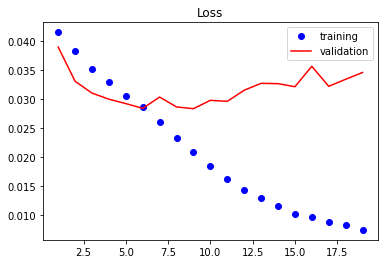

In [27]:
plt.plot(range(1,len(train_losses)+1), train_losses, 'bo', label='training')
plt.plot(range(1,len(val_losses)+1), val_losses, 'r', label='validation')
plt.title('Loss')
plt.legend()

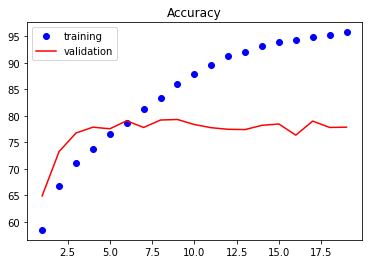

In [28]:
plt.plot(range(1,len(train_accuracy)+1), train_accuracy, 'bo', label='training')
plt.plot(range(1,len(val_accuracy)+1), val_accuracy, 'r', label='validation')
plt.title('Accuracy')
plt.legend()

- Overfitting occurs after epoch 6

In [29]:
savePath = "C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/Vanilla_CNN-dogsandcats.pth"
torch.save(model.state_dict(), savePath)